In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [4]:
data = pd.read_csv(r"C:\Users\SK\OneDrive\Desktop\Projects\Power Query\ds_Shubhendra_Kumar\csv_files\fear_greed_index.csv")
data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
df=data.copy()
df1=data.copy()
df2 = data.copy()
df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [15]:
classification_map = {
    "Extreme Fear" : -2,
    "Fear" : -1,
    "Neutral" : 0,
    "Greed" : 1
}
df["classification_score"] = df["classification"].map(classification_map)
df.head()

,timestamp,value,classification,date,classification_score
0,2018-02-01 05:30:00,30,Fear,2018-02-01,-1.0
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02,-2.0
2,2018-02-03 05:30:00,40,Fear,2018-02-03,-1.0
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04,-2.0
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05,-2.0


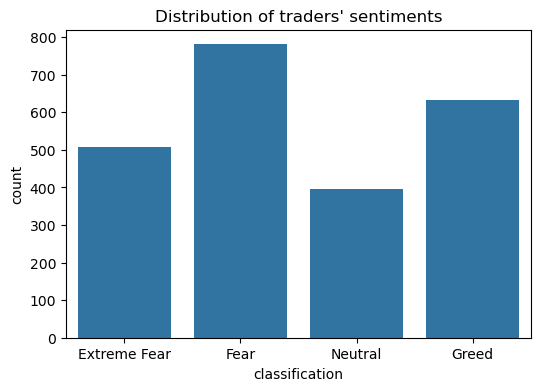

In [104]:
plt.figure(figsize=(6,4))
sns.countplot(x="classification",data = df, order= ["Extreme Fear","Fear","Neutral","Greed"])
plt.title("Distribution of traders' sentiments")
plt.savefig(fname = 'Distribution of traders sentiments.png',dpi=800)
plt.show()

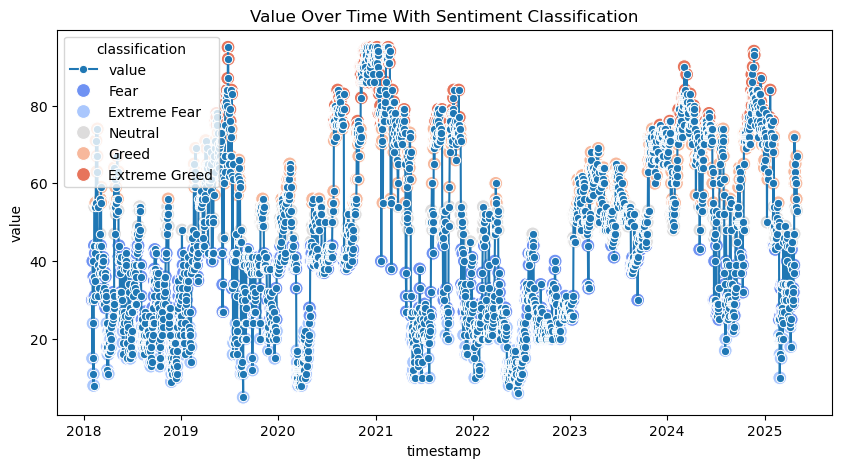

In [102]:
plt.figure(figsize= (10,5))
sns.lineplot(x = "timestamp",y = "value",data = df,marker = 'o', label = 'value')
sns.scatterplot(x="timestamp",y="value",data = df ,hue = "classification",s=100,palette = "coolwarm")
plt.title("Value Over Time With Sentiment Classification")
plt.savefig(fname = 'Value over time with sentiment classification.png',dpi=800)
plt.show()

In [24]:
df["next_state"] = df["classification"].shift(-1)
transition_matrix = pd.crosstab(df["classification"],df["next_state"],normalize = "index")
print("\nTransition Probabilities:\n",transition_matrix)


Transition Probabilities:
 next_state      Extreme Fear  Extreme Greed      Fear     Greed   Neutral
classification                                                           
Extreme Fear        0.818898       0.000000  0.173228  0.000000  0.007874
Extreme Greed       0.000000       0.831288  0.006135  0.159509  0.003067
Fear                0.112676       0.001280  0.781050  0.015365  0.089629
Greed               0.001582       0.085443  0.018987  0.787975  0.106013
Neutral             0.007576       0.000000  0.171717  0.179293  0.641414


In [25]:
df["return"] = df["value"].pct_change().shift(-1)
correlation = df[["classification_score","return"]].corr()
print("\nCorrection between sentiment and next step returns:\n",correlation)


Correction between sentiment and next step returns:
                       classification_score    return
classification_score              1.000000 -0.161644
return                           -0.161644  1.000000


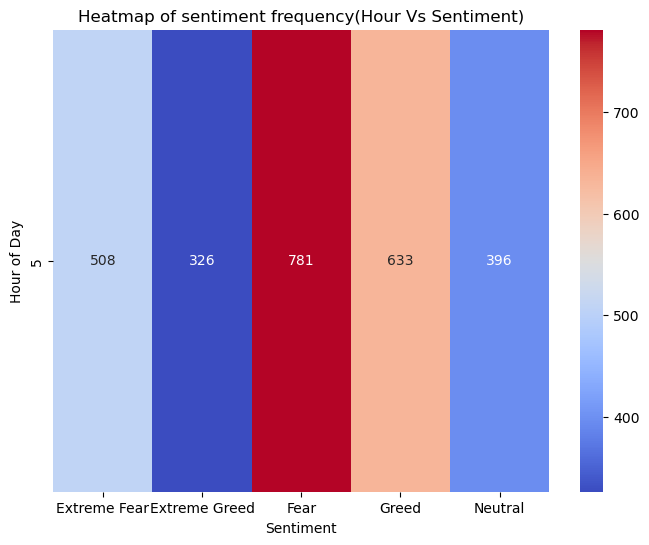

In [101]:
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour

heatmap_data =  pd.crosstab(df["hour"],df["classification"])

plt.figure(figsize = (8,6))
sns.heatmap(heatmap_data,cmap = "coolwarm", annot = True,fmt = "d")
plt.title("Heatmap of sentiment frequency(Hour Vs Sentiment)")
plt.ylabel("Hour of Day")
plt.xlabel("Sentiment")
plt.savefig(fname = 'Heatmap of sentiment frequency.png',dpi=800)
plt.show()

In [27]:
trades = pd.read_csv(r"C:\Users\SK\OneDrive\Desktop\Projects\Power Query\ds_Shubhendra_Kumar\csv_files\historical_data.csv")
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [28]:
trades_df = trades.copy()

In [32]:
num_map = {
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl',
    'Fee': 'fee',
    'Execution Price': 'price'
}
for orig, new in num_map.items():
    if orig in trades.columns:
        trades[new] = pd.to_numeric(trades[orig], errors='coerce')
    else:
        trades[new] = np.nan

In [33]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,size_tokens,size_usd,closed_pnl,fee,price
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,986.87,7872.16,0.0,0.345404,7.9769
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,16.00,127.68,0.0,0.005600,7.9800
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,144.09,1150.63,0.0,0.050431,7.9855
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,142.98,1142.04,0.0,0.050043,7.9874
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,8.73,69.75,0.0,0.003055,7.9894


In [35]:
trades["notional"] = trades["size_usd"].abs()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,size_tokens,size_usd,closed_pnl,fee,price,notional
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,986.87,7872.16,0.0,0.345404,7.9769,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,16.00,127.68,0.0,0.005600,7.9800,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,144.09,1150.63,0.0,0.050431,7.9855,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,142.98,1142.04,0.0,0.050043,7.9874,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,8.73,69.75,0.0,0.003055,7.9894,69.75


In [45]:
trades["return_pct"] = trades.apply(
    lambda r: (r["closed_pnl"] / r["notional"]) if pd.notnull(r['closed_pnl']) and r['notional'] not in (0, np.nan) else np.nan,
    axis=1 )


In [46]:
trades["win"] = trades["closed_pnl"]>0
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,size_tokens,size_usd,closed_pnl,fee,price,notional,return_pct,win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,8.950000e+14,1.730000e+12,986.87,7872.16,0.0,0.345404,7.9769,7872.16,0.0,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,4.430000e+14,1.730000e+12,16.00,127.68,0.0,0.005600,7.9800,127.68,0.0,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,6.600000e+14,1.730000e+12,144.09,1150.63,0.0,0.050431,7.9855,1150.63,0.0,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,1.080000e+15,1.730000e+12,142.98,1142.04,0.0,0.050043,7.9874,1142.04,0.0,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,1.050000e+15,1.730000e+12,8.73,69.75,0.0,0.003055,7.9894,69.75,0.0,False


In [48]:
trades['ts'] = pd.to_datetime(trades["Timestamp IST"], errors='coerce')
trades["hour"] = trades["ts"].dt.hour

In [51]:
trades["date"] = trades["ts"].dt.date
trades["week"] = trades["ts"].dt.isocalendar().week
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,closed_pnl,fee,price,notional,return_pct,win,ts,hour,date,week
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,0.0,0.345404,7.9769,7872.16,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,0.0,0.005600,7.9800,127.68,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,0.0,0.050431,7.9855,1150.63,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,0.0,0.050043,7.9874,1142.04,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,0.0,0.003055,7.9894,69.75,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7


In [53]:
acct_daily = trades.groupby(["Account","date"]).agg(daily_notional=("notional","sum")).reset_index()

In [54]:
trades =trades.merge(acct_daily,how = "left",on=["Account","date"])

In [55]:
trades["leverage_proxy"] = trades["notional"] / trades["daily_notional"]

In [56]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,price,notional,return_pct,win,ts,hour,date,week,daily_notional,leverage_proxy
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,7.9769,7872.16,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7,78277.3,0.100568
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,7.9800,127.68,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7,78277.3,0.001631
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,7.9855,1150.63,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7,78277.3,0.014699
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,7.9874,1142.04,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7,78277.3,0.014590
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,7.9894,69.75,0.0,False,2024-02-12 22:50:00,22.0,2024-02-12,7,78277.3,0.000891


In [58]:
trades["fee"] = pd.to_numeric(trades["fee"],errors = 'coerce')
trades["fee_pct_of_notional"] = trades.apply(
    lambda r: (r["fee"] / r["notional"]) if pd.notnull(r["fee"]) and r["notional"] not in (0,np.nan) else np.nan,axis = 1
)

In [67]:
overall = {
    'n_trades': len(trades),
    'total_notional':trades['notional'].sum(skipna=True),
    'avg_notional':trades['notional'].mean(skipna=True),
    'median_notional':trades['notional'].median(skipna=True),
    'avg_return_pct':trades['return_pct'].mean(skipna=True),
    'win_rate':trades['win'].mean(),
    'std_return_pct':trades['return_pct'].std(skipna =True),
    'avg_fee_pct':trades['fee_pct_of_notional'].mean()
}
print(overall)

{'n_trades': 211224, 'total_notional': np.float64(1191187442.4600003), 'avg_notional': np.float64(5639.4512103738225), 'median_notional': 597.0450000000001, 'avg_return_pct': np.float64(0.01899492939862906), 'win_rate': np.float64(0.4112648183918494), 'std_return_pct': 0.8458132989951517, 'avg_fee_pct': np.float64(0.00034886039195041835)}


In [69]:
overall_by_time = trades.groupby('hour').agg(
    n_trades=('Account','count'),
    avg_return_pct = ('return_pct','count'),
    win_rate = ('win','mean'),
    avg_notional=('notional','mean')
).reset_index()
print(overall_by_time)

    hour  n_trades  avg_return_pct  win_rate  avg_notional
0    0.0      3954            3954  0.388973   6475.220078
1    1.0      4000            4000  0.529500   4837.847037
2    2.0      2928            2928  0.290301   6348.790478
3    3.0      3330            3330  0.343844   5606.120039
4    4.0      4205            4205  0.364804   8335.923144
5    5.0      2991            2978  0.272484   9251.303704
6    6.0      4324            4324  0.367946   5145.274389
7    7.0      3287            3287  0.475205   8371.531080
8    8.0      3152            3152  0.488579   6565.875863
9    9.0      1866            1866  0.358521   5341.721243
10  10.0      2106            2106  0.532289   2385.812113
11  11.0      2149            2149  0.514658   3612.887678
12  12.0      2188            2188  0.514625   3427.691083
13  13.0      1654            1654  0.362757   3672.049855
14  14.0      3013            3013  0.345503   3048.379091
15  15.0      3037            3037  0.554495   2347.9490

In [74]:
overall_by_dir = trades.groupby(['Direction']).agg(
    n_trades=('Account','count'),
    avg_return_pct = ('return_pct','mean'),
    win_rate = ('win','mean'),
    avg_notional = ('notional','mean')
).reset_index()
print(overall_by_dir)

                    Direction  n_trades  avg_return_pct  win_rate  \
0           Auto-Deleveraging         8        0.341969  1.000000   
1                         Buy     16716        0.000000  0.000000   
2                  Close Long     48678        0.020468  0.876905   
3                 Close Short     36013        0.035695  0.779385   
4   Liquidated Isolated Short         1       -0.387498  0.000000   
5                Long > Short        57        0.003392  0.719298   
6                   Open Long     49895        0.000000  0.000000   
7                  Open Short     39741        0.000000  0.000000   
8                        Sell     19902        0.086590  0.804191   
9                  Settlement         1       -0.037320  0.000000   
10               Short > Long        70        0.053155  0.871429   
11       Spot Dust Conversion       142        0.000000  0.000000   

    avg_notional  
0   21188.468750  
1    1866.283623  
2    7851.868378  
3    4992.666359  
4   329

In [88]:
daily = trades.groupby(['date']).agg(
    daily_trades=('Account','count'),
    daily_notional=('notional','sum'),
    daily_avg_return = ('return_pct','mean'),
    win_rate = ('win','mean'),
    daily_vol = ('return_pct','std')
).reset_index()
print(daily)

           date  daily_trades  daily_notional  daily_avg_return  win_rate  \
0    2023-01-05             3          477.00          0.000000  0.000000   
1    2023-05-12             9        50005.83          0.000000  0.000000   
2    2024-01-01            18       264239.53         -0.001354  0.055556   
3    2024-01-02             6         2008.18          0.000000  0.000000   
4    2024-01-03           137       472974.70          0.032566  0.934307   
..          ...           ...             ...               ...       ...   
183  2025-11-04          1096     11319327.07          0.009375  0.335766   
184  2025-12-01           602      2258459.17          0.005680  0.784053   
185  2025-12-02          1031      4143974.54          0.003045  0.462658   
186  2025-12-03          3968     18618139.15          0.030111  0.564516   
187  2025-12-04          2109     55914617.49          0.012152  0.272167   

     daily_vol  
0     0.000000  
1     0.000000  
2     0.003441  
3     0

In [84]:
trades_sorted = trades.sort_values('ts')
trades_sorted['cum_pnl']=trades_sorted['closed_pnl'].cumsum()
cum = trades_sorted['cum_pnl']
roll_max = cum.cummax()
drawdown = (cum - roll_max)
max_drawdown=drawdown.min()
trades_sorted.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,return_pct,win,ts,hour,date,week,daily_notional,leverage_proxy,fee_pct_of_notional,cum_pnl
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,...,0.0,False,2023-01-05 01:06:00,1.0,2023-01-05,1,477.00,0.327862,0.00000,0.0
83771,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,...,0.0,False,2023-01-05 01:06:00,1.0,2023-01-05,1,477.00,0.287379,0.00000,0.0
83769,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,...,0.0,False,2023-01-05 01:06:00,1.0,2023-01-05,1,477.00,0.384759,0.00000,0.0
39055,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,...,0.0,False,2023-05-12 03:11:00,3.0,2023-05-12,19,50005.83,0.022000,0.00025,0.0
39056,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,...,0.0,False,2023-05-12 03:11:00,3.0,2023-05-12,19,50005.83,0.038714,0.00025,0.0


In [86]:
tail_5 = trades['return_pct'].dropna().quantile(0.05)

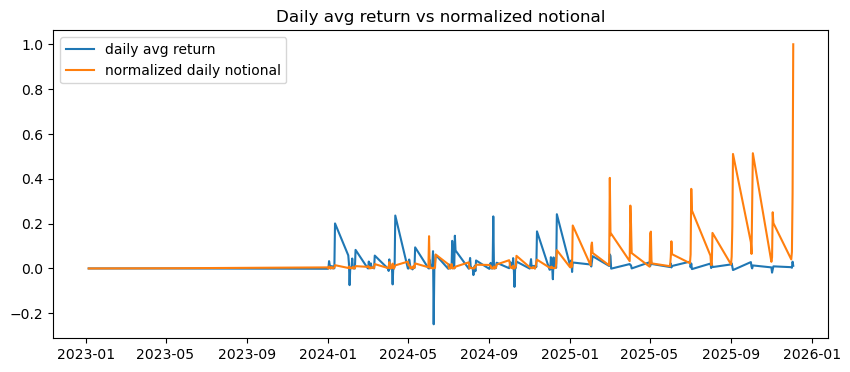

In [100]:
plt.figure(figsize = (10,4))
plt.plot(daily['date'],daily['daily_avg_return'],label='daily avg return')
plt.plot(daily['date'],daily['daily_notional'] / daily['daily_notional'].max(),label = 'normalized daily notional')
plt.legend()
plt.title('Daily avg return vs normalized notional')
plt.savefig(fname = 'daily avg return vs normalized notional.png',dpi=800)
plt.show()

In [105]:
overall_by_time.to_csv("overall_by_time.csv",index = False)
overall_by_dir.to_csv("overall_by_direction.csv",index = False)
daily.to_csv("daily.csv",index = False)
trades.to_csv("historical_prepro.csv",index = False)

In [106]:
print("Overall summary:", overall)

Overall summary: {'n_trades': 211224, 'total_notional': np.float64(1191187442.4600003), 'avg_notional': np.float64(5639.4512103738225), 'median_notional': 597.0450000000001, 'avg_return_pct': np.float64(0.01899492939862906), 'win_rate': np.float64(0.4112648183918494), 'std_return_pct': 0.8458132989951517, 'avg_fee_pct': np.float64(0.00034886039195041835)}


In [108]:
results = {
    'overall': overall,
    'max_drawdown': max_drawdown,
    'tail_5_return_pct': tail_5
}

In [109]:
print(results)

{'overall': {'n_trades': 211224, 'total_notional': np.float64(1191187442.4600003), 'avg_notional': np.float64(5639.4512103738225), 'median_notional': 597.0450000000001, 'avg_return_pct': np.float64(0.01899492939862906), 'win_rate': np.float64(0.4112648183918494), 'std_return_pct': 0.8458132989951517, 'avg_fee_pct': np.float64(0.00034886039195041835)}, 'max_drawdown': -437570.038092006, 'tail_5_return_pct': np.float64(-0.010710616374127072)}


In [110]:
df.to_csv("sentiment.csv",index = False)